## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [419]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [420]:
# your code here
data = pd.read_csv("german_credit.csv")

In [421]:
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


In [422]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [423]:
data.isna().sum() # Nan'ов нет

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [424]:
not_num_feature_mask = (data.dtypes == 'object').values

In [425]:
data[data.columns[~not_num_feature_mask]].head() # количественные признаки

,duration,amount,age
0,18,1049,21
1,9,2799,36
2,12,841,23
3,12,2122,39
4,12,2171,38


In [426]:
num_features = data[data.columns[~not_num_feature_mask]].columns
num_features

Index(['duration', 'amount', 'age'], dtype='object')

In [427]:
bin_features = []
cat_features = []
for col in data.columns[not_num_feature_mask]:
    if data[col].unique().size == 2:
        bin_features.append(col)
    else:
        cat_features.append(col)

In [428]:
bin_features # бинарные

['people_liable', 'telephone', 'foreign_worker', 'credit_risk']

In [429]:
cat_features # категориальные, но рассмотрим внимательнее, мб там есть порядковые

['status',
 'credit_history',
 'purpose',
 'savings',
 'employment_duration',
 'installment_rate',
 'personal_status_sex',
 'other_debtors',
 'present_residence',
 'property',
 'other_installment_plans',
 'housing',
 'number_credits',
 'job']

In [430]:
data[cat_features].head() # есть очивидные кандидаты

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,other_installment_plans,housing,number_credits,job
0,no checking account,all credits at this bank paid back duly,car (used),unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,>= 7 yrs,car or other,none,for free,1,skilled employee/official
1,no checking account,all credits at this bank paid back duly,others,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,none,for free,2-3,skilled employee/official
2,... < 0 DM,no credits taken/all credits paid back duly,retraining,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,>= 7 yrs,unknown / no property,none,for free,1,unskilled - resident
3,no checking account,all credits at this bank paid back duly,others,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,none,for free,2-3,unskilled - resident
4,no checking account,all credits at this bank paid back duly,others,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,>= 7 yrs,car or other,bank,rent,2-3,unskilled - resident


In [431]:
ordered_features = ['employment_duration',
                   'installment_rate',
                   'present_residence',
                   'number_credits']

In [432]:
for feature in ordered_features:
    cat_features.remove(feature)

In [433]:
cat_features

['status',
 'credit_history',
 'purpose',
 'savings',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'job']

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [434]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [435]:
data['housing'].unique()

array(['for free', 'rent', 'own'], dtype=object)

In [436]:
rent_mask = data['housing'] == 'rent'
younger_30_mask = data['age'] < 30
older_40_mask = data['age'] > 40

shape_1 = data[younger_30_mask & rent_mask].shape[0] /  data[younger_30_mask].shape[0]
shape_2 = data[older_40_mask & rent_mask].shape[0] /  data[older_40_mask].shape[0]

print(f"Процент клиентов моложе 30 лет, которые снимают жилье: {round(shape_1 * 100, 2)}%")
print(f"Процент клиентов старше 40 лет, которые снимают жилье: {round(shape_2 * 100, 2)}%")

Процент клиентов моложе 30 лет, которые снимают жилье: 66.67%
Процент клиентов старше 40 лет, которые снимают жилье: 68.01%


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [437]:
data['number_credits'].unique()

array(['1', '2-3', '4-5', '>= 6'], dtype=object)

In [438]:
data[(data['foreign_worker'] == 'yes') & ((data['number_credits'] == '4-5') | (data['number_credits'] == '>= 6'))].shape[0]

1

### Задание 6 (1 балл)

In [439]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

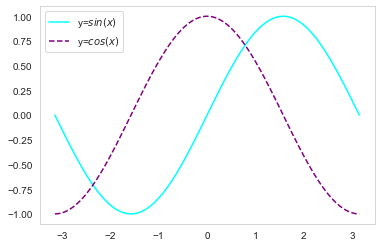

In [440]:
x = np.linspace(-np.pi, np.pi, 100)
sin_y = np.sin(x)
cos_y = np.cos(x)
plt.plot(x, sin_y, label='y=$sin(x)$', c='aqua')
plt.plot(x, cos_y, "--", label='y=$cos(x)$', c="purple")
plt.grid()
plt.legend();

In [441]:
# your code here

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [442]:
fix_states = sorted(data['status'].unique())
fix_states

['... < 0 DM',
 '... >= 200 DM / salary for at least 1 year',
 '0<= ... < 200 DM',
 'no checking account']

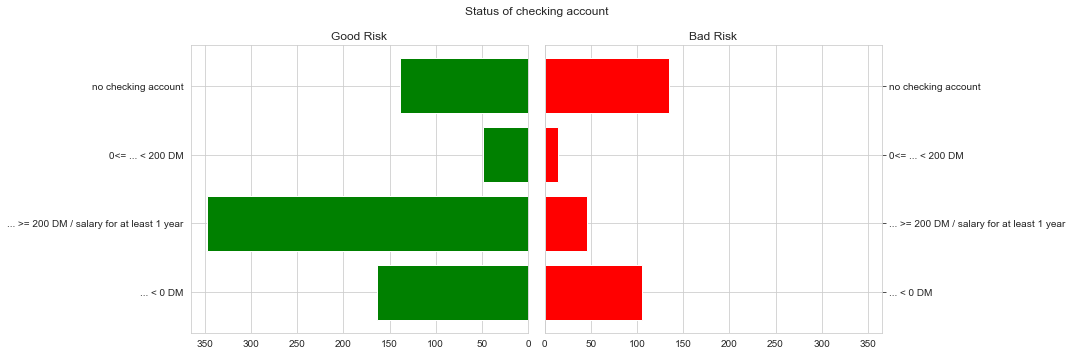

In [443]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
max_lim = np.max(data.groupby('credit_risk')['status'].value_counts())
for i, risk in enumerate(data['credit_risk'].unique()):
    stats = data[data['credit_risk'] == risk]['status'].value_counts()
    ax[i].set_title(risk.capitalize()+' Risk')
    ax[i].set_xlim(right=(max_lim + 0.05 * max_lim))
    ax[i].barh(fix_states, stats[fix_states], color=('r' if i else 'g'))
    if not i:
        ax[i].invert_xaxis()
    else:
        ax[i].yaxis.tick_right()
fig.suptitle("Status of checking account")
fig.tight_layout()

In [444]:
# your code here

### Задание 8  (0.5 балла)

In [445]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

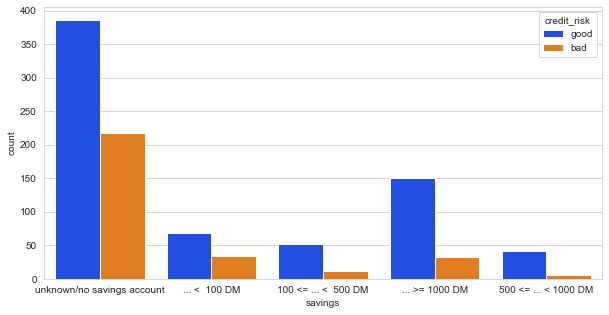

In [446]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='savings', hue='credit_risk', palette='bright');

In [447]:
# your code here

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

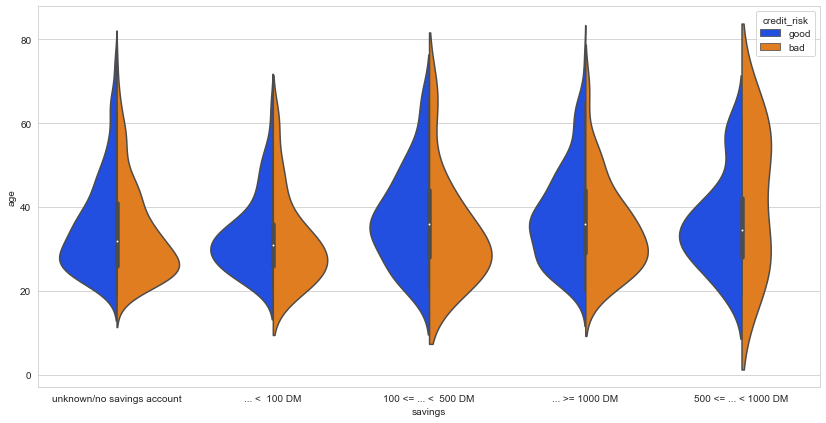

In [448]:
plt.figure(figsize=(14, 7))
sns.violinplot(data=data, x="savings", y="age", hue="credit_risk", split=True, palette='bright');

In [449]:
# your code here

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

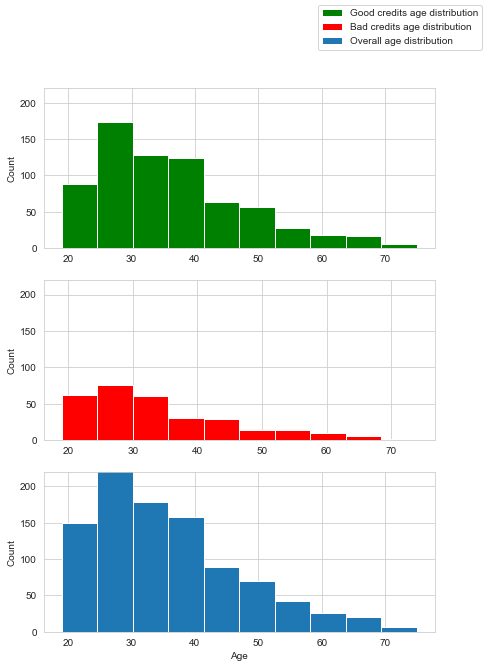

In [450]:
fig, axes = plt.subplots(3, 1, figsize=(7, 10))

axes[0].hist(data[data['credit_risk'] == 'good']['age'], color='g', label='Good credits age distribution') 
axes[1].hist(data[data['credit_risk'] == 'bad']['age'], color='r', label='Bad credits age distribution') 
axes[2].hist(data['age'], label='Overall age distribution')

lines, labels = [], [] 
for ax in axes: 
    line, label = ax.get_legend_handles_labels() 
    lines.extend(line) 
    labels.extend(label) 
    ax.set_ylim(0, 220) 
    ax.set_ylabel('Count') 
fig.legend(lines, labels) 
plt.xlabel('Age') ;

In [451]:
# your code here

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

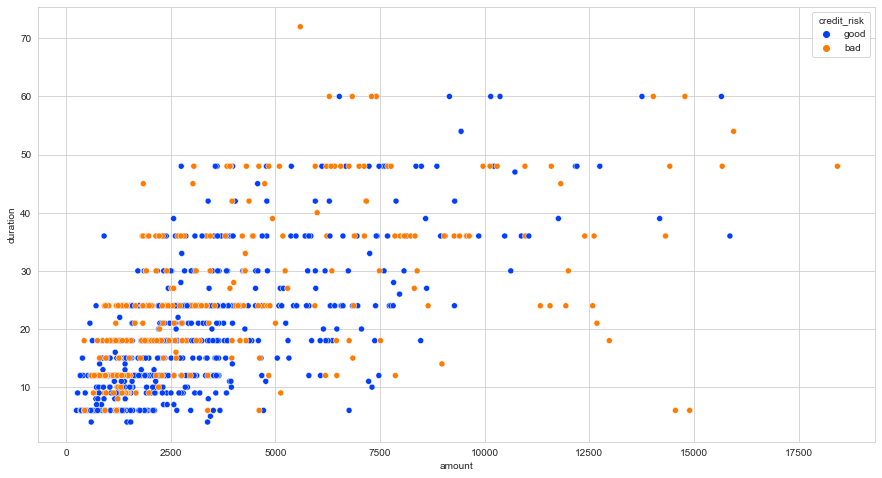

In [452]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=data, x="amount", y="duration", hue="credit_risk", palette='bright');

In [453]:
# your code here

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

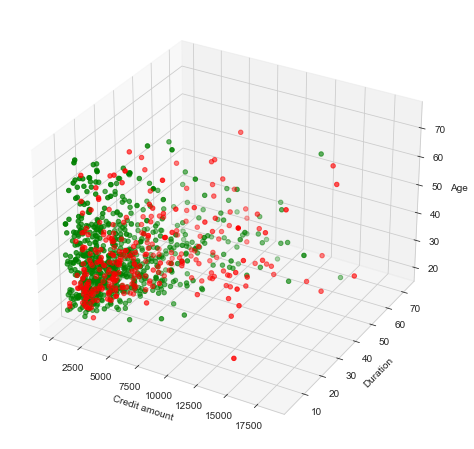

In [454]:
good_data = data[data['credit_risk'] == 'good']
bad_data = data[data['credit_risk'] == 'bad']

sns.set_style("whitegrid")

plt.figure(figsize=(8, 8))
axes = plt.axes(projection='3d')
axes.scatter3D(bad_data['amount'], bad_data['duration'], bad_data['age'], color='r')
axes.scatter3D(good_data['amount'], good_data['duration'], good_data['age'], color='g')

axes.set_xlabel('Credit amount')
axes.set_ylabel('Duration')
axes.set_zlabel('Age');

In [455]:
# your code here

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [456]:
from sklearn.preprocessing import LabelEncoder

In [457]:
for col in ordered_features:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])
data[ordered_features].head()

,employment_duration,installment_rate,present_residence,number_credits
0,2,2,3,0
1,0,1,0,1
2,1,1,3,0
3,0,0,0,1
4,0,2,3,1


In [458]:
for col in bin_features:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])
data[bin_features].head()

,people_liable,telephone,foreign_worker,credit_risk
0,0,0,0,1
1,1,0,0,1
2,0,0,0,1
3,1,0,1,1
4,0,0,1,1


У категориальных сделаем One Hot Encoding

In [459]:
dummies = pd.get_dummies(data[cat_features], drop_first=True)
dummies.head()

,status_... >= 200 DM / salary for at least 1 year,status_0<= ... < 200 DM,status_no checking account,credit_history_critical account/other credits elsewhere,credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/all credits paid back duly,purpose_car (new),purpose_car (used),purpose_domestic appliances,...,property_car or other,property_real estate,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident
0,0,0,1,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [460]:
edit_data = pd.concat([data[ordered_features], data[num_features], dummies, data[bin_features]], axis=1)
edit_data.head()

,employment_duration,installment_rate,present_residence,number_credits,duration,amount,age,status_... >= 200 DM / salary for at least 1 year,status_0<= ... < 200 DM,status_no checking account,...,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident,people_liable,telephone,foreign_worker,credit_risk
0,2,2,3,0,18,1049,21,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,1,9,2799,36,0,0,1,...,0,0,0,1,0,0,1,0,0,1
2,1,1,3,0,12,841,23,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,1,12,2122,39,0,0,1,...,0,0,0,0,0,1,1,0,1,1
4,0,2,3,1,12,2171,38,0,0,1,...,0,0,1,0,0,1,0,0,1,1


## Задание 14 (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше! Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

отскейлим данные

In [461]:
from sklearn.preprocessing import StandardScaler

In [463]:
edit_data[num_features].head()

,duration,amount,age
0,18,1049,21
1,9,2799,36
2,12,841,23
3,12,2122,39
4,12,2171,38


In [464]:
for col in num_features:
    scaler = StandardScaler()
    edit_data[col] = scaler.fit_transform(edit_data[col].values.reshape(-1, 1))
edit_data[num_features].head()

,duration,amount,age
0,-0.240857,-0.787657,-1.281573
1,-0.987573,-0.167384,0.040363
2,-0.738668,-0.861381,-1.105315
3,-0.738668,-0.407341,0.304750
4,-0.738668,-0.389974,0.216621


Построим корреляционную таблицу, рассмотрим столбец с тагретом, чтобы понять какие признаки с ним коррелируют

чем ближе по модулю к 1, тем сильнее корреляция => отсортируем

In [465]:
data_corr = edit_data.corr()
data_corr['credit_risk'].apply(lambda x: abs(x)).sort_values()

other_debtors_none                                            0.000751
people_liable                                                 0.003015
job_unemployed/unskilled - non-resident                       0.005951
property_car or other                                         0.007238
purpose_radio/television                                      0.008016
employment_duration                                           0.008932
installment_rate                                              0.011273
credit_history_existing credits paid back duly till now       0.012325
present_residence                                             0.012495
job_skilled employee/official                                 0.013559
personal_status_sex_female : single                           0.019630
purpose_domestic appliances                                   0.020828
purpose_car (used)                                            0.020971
job_unskilled - resident                                      0.021822
purpos

составим список претендентов на важные признаки, где коэффициент корреляции по модулю больше 0.1 (очевидно, что таргет сам с собой коррелирует)

In [ ]:
edit_data['other_installment_plans_stores']

In [538]:
# топ последних
candidates = [
    "housing_rent",
    "credit_history_delay in paying off in the past",
    "amount",
    "savings_unknown/no savings account",
    "duration",
    "status_no checking account",
    "status_... >= 200 DM / salary for at least 1 year"
]

веса расставим пропорционально коэфф. корреляции

In [539]:
weights = np.linspace(0.1, 3, len(candidates))
weights

array([0.1       , 0.58333333, 1.06666667, 1.55      , 2.03333333,
       2.51666667, 3.        ])

In [540]:
cols = list(edit_data.columns)
idxs = []
for candidate in candidates:
    idxs.append(cols.index(candidate))
idxs

[38, 11, 5, 26, 4, 9, 7]

In [541]:
full_weights = np.full(45, 0.01)
for idx, weight in zip(idxs, weights):
    full_weights[idx] = weight
full_weights

array([0.01      , 0.01      , 0.01      , 0.01      , 2.03333333,
       1.06666667, 0.01      , 3.        , 0.01      , 2.51666667,
       0.01      , 0.58333333, 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 1.55      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.1       , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ])

In [542]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = edit_data.drop('credit_risk', 1).values
y = edit_data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

C:\Users\jaaj\AppData\Local\Temp/ipykernel_10596/1477864094.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = edit_data.drop('credit_risk', 1).values


найдем порог

In [543]:
summed_data = pd.DataFrame({'sum': X_train @ full_weights.T,
                           'credit_risk': y_train})
summed_data.head()

,sum,credit_risk
0,3.674630,1
1,5.936665,1
2,4.532512,1
3,2.584380,1
4,1.960824,1


In [544]:
summed_data.groupby('credit_risk').mean()

,sum
credit_risk,
0,3.800467
1,2.536691


In [545]:
threshold = summed_data.groupby('credit_risk').mean().mean().values[0]
threshold

3.1685787905613974

In [546]:
def predict(Xtest: np.array) -> np.array:
    return np.array(Xtest @ full_weights.T < threshold, dtype=int)

accuracy_score(y_test, predict(X_test))

0.576